Taylor Salo

In [1]:
%matplotlib inline
from __future__ import division
import numpy as np
import brian2 as br
import pylab as plt
import seaborn as sns

sns.set_style('darkgrid')
palette = sns.light_palette('purple', 10)[::2]
plt.rcParams['figure.figsize'] = [12, 8]

# Question 1

In [2]:
# Set parameters
R = 100 * br.Mohm  # membrane resistance
tau_m = 24 * br.ms  # membrane time constant
u_rest = -65 * br.mV  # resting potential
u_r = -60 * br.mV  # reset potential
theta_reset = 40 * br.mV  # reset threshold
vartheta_rh = -52 * br.mV  # rheobase threshold
delta_T = 1 * br.mV  # sharpness of ap upswing

tau_w = 30 * br.ms  # adaptation time constant
a = 0 * br.nS  # subthreshold adaptation constant
b = 250 * br.pamp  # adaptation jump after a spike

eqs = '''
du/dt = ( -(u - u_rest) + delta_T*exp((u-vartheta_rh)/delta_T) -
        R*w + R*I ) / tau_m : volt
dw/dt = (a*(u - u_rest) - w)/tau_w : amp
I = input_current(t) : amp
'''

## Part A

In [3]:
input_current = np.zeros((1000,))
input_current[[99, 499]] = 3900
input_current = br.TimedArray(input_current*br.pamp, dt=1*br.ms)

br.start_scope()
AdEx = br.NeuronGroup(1, eqs, threshold='u>theta_reset',
                      reset='u=u_r; w+= b', method='euler')
AdEx.u = u_rest
AdEx.w = 0  # * br.pamp

rec = br.StateMonitor(AdEx, ('u', 'w'), record=True)
br.run(1*br.second)

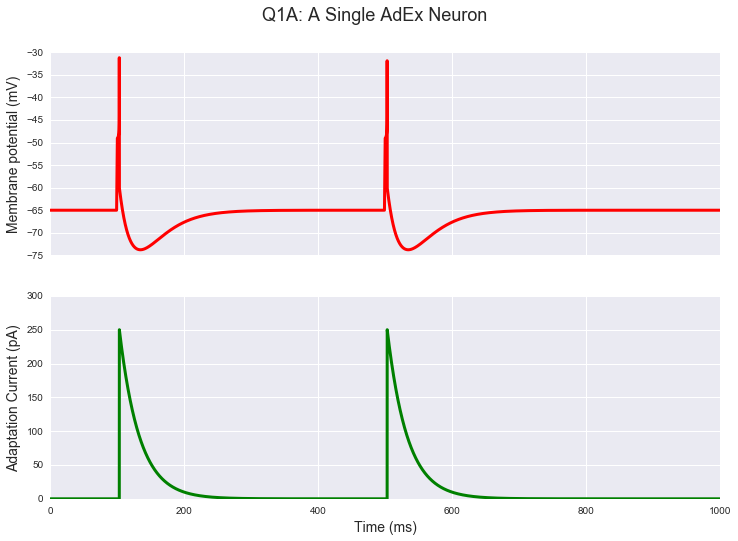

In [4]:
# Plot membrane potential and adaptation current against time
# for AdEx neuron.
fig, axes = plt.subplots(2, sharex=True)
fig.suptitle('Q1A: A Single AdEx Neuron', fontsize=18)
axes[0].plot(rec.t/br.ms, rec.u[0]*1000,
             label='Membrane Potential (mV)', lw=3., c='r')
axes[1].plot(rec.t/br.ms, rec.w[0]*10**12,
             label='Adaptation Current (pA)', lw=3., c='g')
axes[1].set_xlabel('Time (ms)', fontsize=14)
axes[0].set_ylabel('Membrane potential (mV)', fontsize=14)
axes[1].set_ylabel('Adaptation Current (pA)', fontsize=14)
plt.show(fig)

The membrane potential (u) increases when input current is applied, reaching the reset threshold and spiking. After each spike, the membrane potential decreases to -75 mV in the refractory period before returning to the resting potential.  

The adaptation current (w) peaks when a spike occurs and then degrades over time. The inputs are spaced out enough that the adaptation current drops back down to ~0 before the next input occurs, meaning that the adaptation did not affect the membrane potential significantly in this model.  

The adaptation current influences the voltages only if inputs occur close enough together for the adaptation current not to drop to zero.

## Part B

In [5]:
input_current = np.zeros((1000,))
input_current[[99, 199]] = 3900
input_current = br.TimedArray(input_current*br.pamp, dt=1*br.ms)

br.start_scope()
AdEx = br.NeuronGroup(1, eqs, threshold='u>theta_reset',
                      reset='u=u_r; w+= b', method='euler')
AdEx.u = u_rest
AdEx.w = 0. * br.pamp

rec = br.StateMonitor(AdEx, ('u', 'w'), record=True)
br.run(1*br.second)

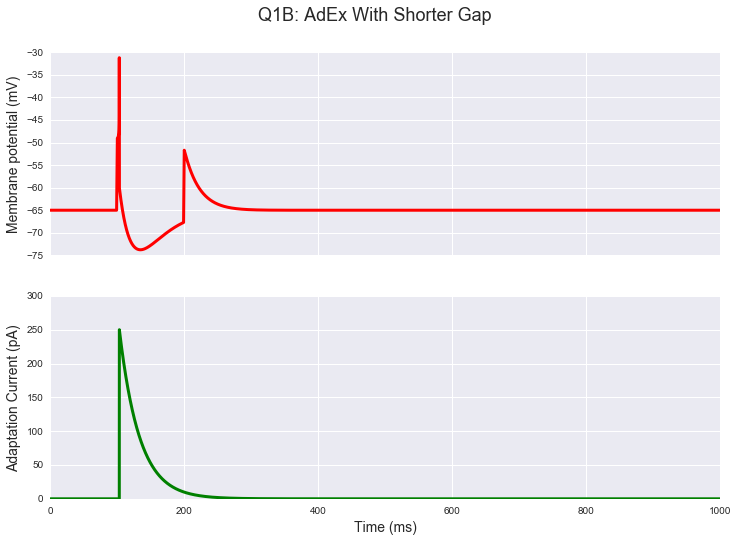

In [6]:
# Plot membrane potential and adaptation current against time
# for AdEx neuron.
fig, axes = plt.subplots(2, sharex=True)
fig.suptitle('Q1B: AdEx With Shorter Gap', fontsize=18)
axes[0].plot(rec.t/br.ms, rec.u[0]*1000,
             label='Membrane Potential (mV)', lw=3., c='r')
axes[1].plot(rec.t/br.ms, rec.w[0]*10**12,
             label='Adaptation Current (pA)', lw=3., c='g')
axes[1].set_xlabel('Time (ms)', fontsize=14)
axes[0].set_ylabel('Membrane potential (mV)', fontsize=14)
axes[1].set_ylabel('Adaptation Current (pA)', fontsize=14)
plt.show(fig)

The decreased spacing between the inputs meant that the adaptation current had not dropped to zero. As a result, the adaptation current decreased the effect of the second input, preventing a spike. If we increased *a* or decreased *tau_w*, the adaptation current would decrease more quickly and a second spike would be possible so soon after the first spike.

## Part C

In [7]:
a = 10 * br.nS

br.start_scope()
AdEx = br.NeuronGroup(1, eqs, threshold='u>theta_reset',
                      reset='u=u_r; w+= b', method='euler')
AdEx.u = u_rest
AdEx.w = 0. * br.pamp

rec = br.StateMonitor(AdEx, ('u', 'w'), record=True)
br.run(1*br.second)

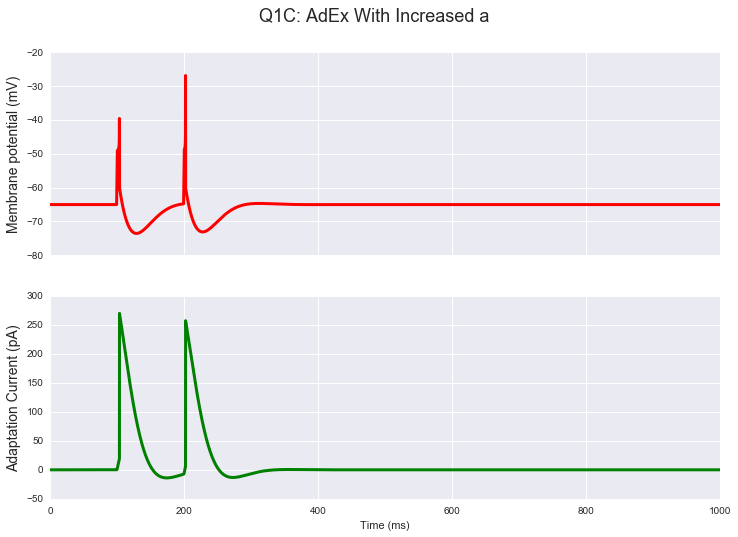

In [8]:
# Plot membrane potential and adaptation current against time
# for AdEx neuron.
fig, axes = plt.subplots(2, sharex=True)
fig.suptitle('Q1C: AdEx With Increased a', fontsize=18)
axes[0].plot(rec.t/br.ms, rec.u[0]*1000,
             label='Membrane Potential (mV)', lw=3, c='r')
axes[1].plot(rec.t/br.ms, rec.w[0]*10**12,
             label='Adaptation Current (pA)', lw=3., c='g')
axes[1].set_xlabel('Time (ms)')
axes[0].set_ylabel('Membrane potential (mV)', fontsize=14)
axes[1].set_ylabel('Adaptation Current (pA)', fontsize=14)
plt.show(fig)

The positive value for *a* means that the adaptation current drops down to a negative value, unlike Q1B, and at a much faster rate than Q1B. As a result, the adaptation current is actually below zero, briefly decreasing adaptation, at the time of the second impulse current. The membrane potential is thus high enough at the time of the second impulse current to produce a spike, which has a greater amplitude than the first spike in spite of the fact that the impulse currents are the same.

# Question 2

In [9]:
# Set parameters
R = 100 * br.Mohm  # membrane resistance
tau_m = 24 * br.ms  # membrane time constant
u_rest = -65 * br.mV  # resting potential
u_r = -60 * br.mV  # reset potential
theta_reset = 40 * br.mV  # reset threshold
vartheta_rh = -52 * br.mV  # rheobase threshold
delta_T = 1 * br.mV  # sharpness of ap upswing

tau_w = 50 * br.ms  # adaptation time constant
a = 30 * br.nS  # subthreshold adaptation constant
b = 250 * br.pamp  # adaptation jump after a spike

eqs = '''
du/dt = ( -(u - u_rest) + delta_T*exp((u-vartheta_rh)/delta_T) -
        R*w + R*I ) / tau_m : volt
dw/dt = (a*(u - u_rest) - w)/tau_w : amp
I = input_current(t) : amp
'''

## Part A

In [10]:
# Run model
input_current = np.zeros((1000,))
input_current[99] = 3900
input_current[499] = 3800
input_current = br.TimedArray(input_current*br.pamp, dt=1*br.ms)

br.start_scope()
AdEx = br.NeuronGroup(1, eqs, threshold='u>theta_reset',
                      reset='u=u_r; w+= b', method='euler')
AdEx.u = u_rest
AdEx.w = 0 * br.pamp

rec = br.StateMonitor(AdEx, ('u', 'w'), record=True)
br.run(1*br.second)

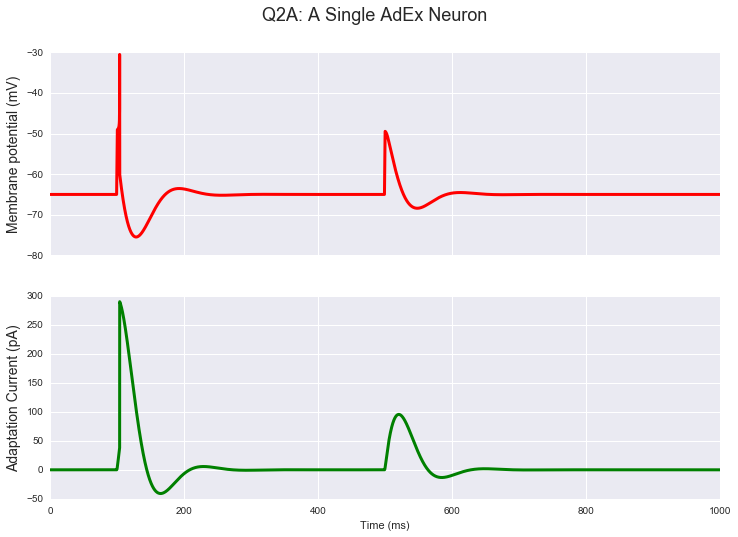

In [11]:
# Plot membrane potential and adaptation current against time
# for AdEx neuron.
fig, axes = plt.subplots(2, sharex=True)
fig.suptitle('Q2A: A Single AdEx Neuron', fontsize=18)
axes[0].plot(rec.t/br.ms, rec.u[0]*1000,
             label='Membrane Potential (mV)', lw=3, c='r')
axes[1].plot(rec.t/br.ms, rec.w[0]*10**12,
             label='Adaptation Current (pA)', lw=3., c='g')
axes[1].set_xlabel('Time (ms)')
axes[0].set_ylabel('Membrane potential (mV)', fontsize=14)
axes[1].set_ylabel('Adaptation Current (pA)', fontsize=14)
plt.show(fig)

The second impulse current does not produce a spike (i.e., the membrane potential does not reach rheobase threshold), even though the adaptation current is zero at the time it is introduced. This means that the relationship between the neuron's resistance and firing threshold requires, at minimum, an impulse current >3800 pA and <= 3900 pA.

The increased value for *tau_w* results in a slower return of *w* to zero, while the increased value for *a* leads to a larger increase in the amplitude of *w* as a result of the impulse currents. The increased *a* also causes the adaptation current to decrease much faster after the impulse currents and to decrease below zero (causing a brief period of potentiation).

## Part B

In [12]:
# Run model
input_current = np.zeros((1000,))
input_current[99] = 3900
input_current[199] = 3800
input_current = br.TimedArray(input_current*br.pamp, dt=1*br.ms)

br.start_scope()
AdEx = br.NeuronGroup(1, eqs, threshold='u>theta_reset',
                      reset='u=u_r; w+= b', method='euler')
AdEx.u = u_rest
AdEx.w = 0 * br.pamp

rec = br.StateMonitor(AdEx, ('u', 'w'), record=True)
br.run(1*br.second)

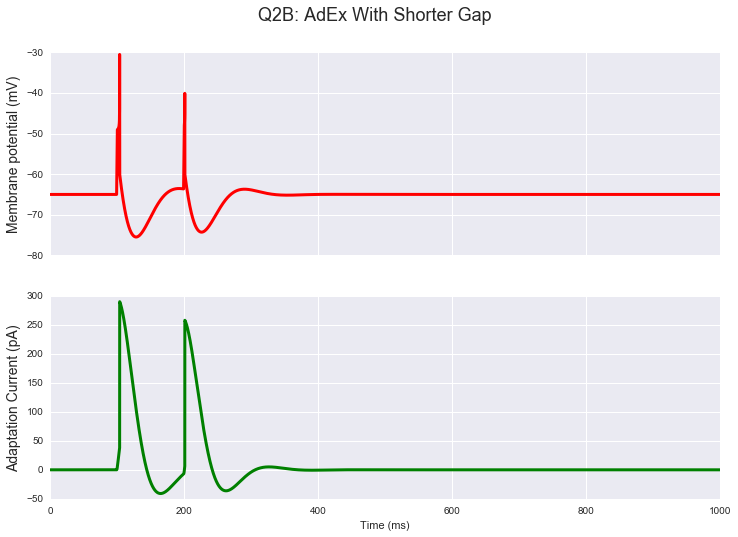

In [13]:
# Plot membrane potential and adaptation current against time
# for AdEx neuron.
fig, axes = plt.subplots(2, sharex=True)
fig.suptitle('Q2B: AdEx With Shorter Gap', fontsize=18)
axes[0].plot(rec.t/br.ms, rec.u[0]*1000,
             label='Membrane Potential (mV)', lw=3., c='r')
axes[1].plot(rec.t/br.ms, rec.w[0]*10**12,
             label='Adaptation Current (pA)', lw=3., c='g')
axes[1].set_xlabel('Time (ms)')
axes[0].set_ylabel('Membrane potential (mV)', fontsize=14)
axes[1].set_ylabel('Adaptation Current (pA)', fontsize=14)
plt.show(fig)

A spike occurs after each impulse current. This happens because the second impulse current occurs while the adaptation current is negative (i.e, potentiating) as a result of the first impulse current. This brief negative adaptation current period occurs because *a* is positive.

Conversely, in Q1B (where *a* equals zero), the second impulse current does not induce a spike, because the adaptation current is not negative at the time of the second impulse current. Thus, the adaptation current depresses in Q1B, but potentiates in Q2B.

# Question 3

In [14]:
# Set parameters
R = 100 * br.Mohm  # membrane resistance
tau_m = 24 * br.ms  # membrane time constant
u_rest = -65 * br.mV  # resting potential
u_r = -60 * br.mV  # reset potential
theta_reset = 40 * br.mV  # reset threshold
vartheta_rh = -52 * br.mV  # rheobase threshold
delta_T = 1 * br.mV  # sharpness of ap upswing

tau_w = 30 * br.ms  # adaptation time constant
a = 0 * br.nS  # subthreshold adaptation constant
b = 250 * br.pamp  # adaptation jump after a spike

eqs = '''
du/dt = ( -(u - u_rest) + delta_T*exp((u-vartheta_rh)/delta_T) -
        R*w + R*I ) / tau_m : volt
dw/dt = (a*(u - u_rest) - w)/tau_w : amp
I = input_current(t) : amp
'''

In [15]:
# Track results
names = {}

## Part A

In [16]:
# Run model
current_range = range(100, 501, 20)
n_spikes_a = []
for current in current_range:
    input_current = np.ones((1000,)) * current
    input_current = br.TimedArray(input_current*br.pamp, dt=1*br.ms)

    br.start_scope()
    AdEx = br.NeuronGroup(1, eqs, threshold='u>theta_reset',
                          reset='u=u_r; w+= b', method='euler')
    AdEx.u = u_rest
    AdEx.w = 0 * br.pamp

    rec = br.SpikeMonitor(AdEx, ('u', 'w'), record=True)
    br.run(1*br.second)
    n_spikes_a.append(rec.count[0])
names['A'] = {'n_spikes': n_spikes_a,
              'descrip': r'AdEx: low $\tau_w$, high b, low $u_r$'}

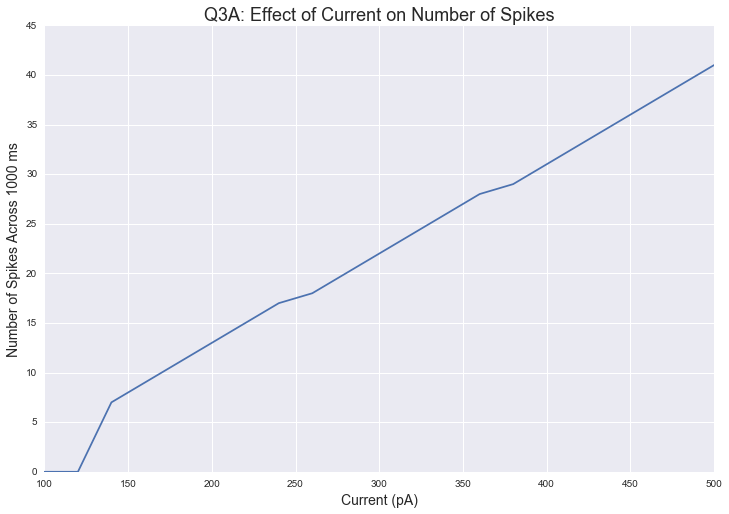

In [17]:
# Plot A
fig, ax = plt.subplots()

ax.set_xlabel('Current (pA)', fontsize=14)
ax.set_ylabel('Number of Spikes Across 1000 ms', fontsize=14)
ax.set_title('Q3A: Effect of Current on Number of Spikes', fontsize=18)
ax.plot(current_range, n_spikes_a)
plt.show()

## Part B

In [18]:
# Run model
tau_w = 200 * br.ms
b = 30 * br.pamp

n_spikes_b = []
for current in current_range:
    input_current = np.ones((1000,)) * current
    input_current = br.TimedArray(input_current*br.pamp, dt=1*br.ms)

    br.start_scope()
    AdEx = br.NeuronGroup(1, eqs, threshold='u>theta_reset',
                          reset='u=u_r; w+= b', method='euler')
    AdEx.u = u_rest
    AdEx.w = 0 * br.pamp

    rec = br.SpikeMonitor(AdEx, ('u', 'w'), record=True)
    br.run(1*br.second)
    n_spikes_b.append(rec.count[0])
names['B'] = {'n_spikes': n_spikes_b,
              'descrip': r'AdEx: high $\tau_w$, low b, low $u_r$'}

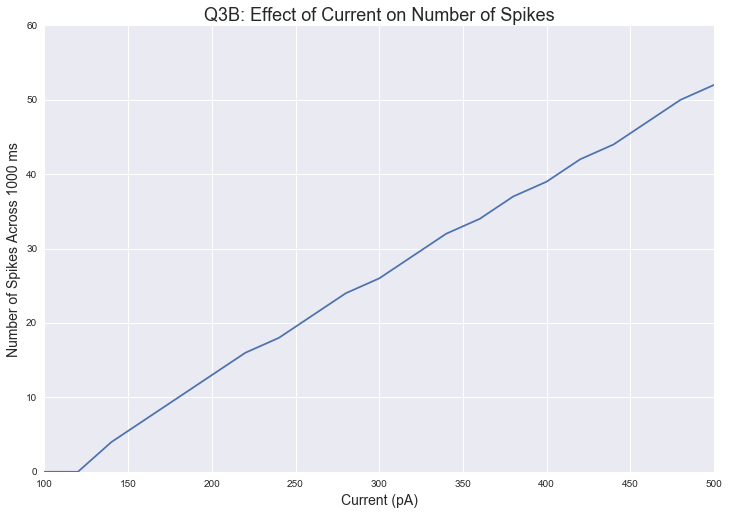

In [19]:
# Plot B
fig, ax = plt.subplots()

ax.set_xlabel('Current (pA)', fontsize=14)
ax.set_ylabel('Number of Spikes Across 1000 ms', fontsize=14)
ax.set_title('Q3B: Effect of Current on Number of Spikes', fontsize=18)
ax.plot(current_range, n_spikes_b)
plt.show()

## Part C

In [20]:
# Run model
tau_w = 200 * br.ms
b = 30 * br.pamp
u_r = -50 * br.mV

n_spikes_c = []
for current in current_range:
    input_current = np.ones((1000,)) * current
    input_current = br.TimedArray(input_current*br.pamp, dt=1*br.ms)

    br.start_scope()
    AdEx = br.NeuronGroup(1, eqs, threshold='u>theta_reset',
                          reset='u=u_r; w+= b', method='euler')
    AdEx.u = u_rest
    AdEx.w = 0 * br.pamp

    rec = br.SpikeMonitor(AdEx, ('u', 'w'), record=True)
    br.run(1*br.second)
    n_spikes_c.append(rec.count[0])
names['C'] = {'n_spikes': n_spikes_c,
              'descrip': r'AdEx: high $\tau_w$, low b, high $u_r$'}

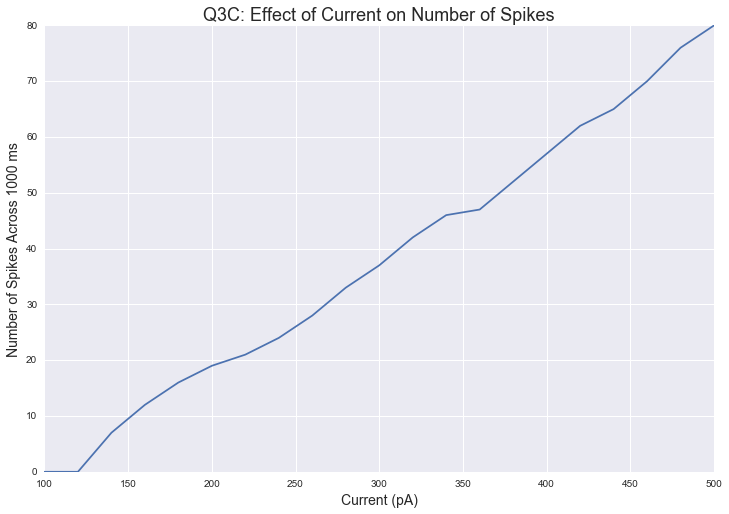

In [21]:
# Plot C
fig, ax = plt.subplots()

ax.set_xlabel('Current (pA)', fontsize=14)
ax.set_ylabel('Number of Spikes Across 1000 ms', fontsize=14)
ax.set_title('Q3C: Effect of Current on Number of Spikes', fontsize=18)
ax.plot(current_range, n_spikes_c)
plt.show()

## Create LIF curve

In [22]:
# Define parameters of the LIF model
R = 100 * br.Mohm  # membrane resistance
tau = 10 * br.ms  # membrane time constant
thr = -50 * br.mV  # spike threshold
u_rest = -65 * br.mV  # resting potential
u_r = -70 * br.mV  # reset potential

# Define equation for the LIF model
eqs = '''
du/dt = ( -(u - u_rest) + R*I ) / tau : volt
I = input_current(t) : amp
'''

n_spikes_lif = []
for current in current_range:
    br.start_scope()
    tmp = np.ones((1000,))
    tmp *= current

    input_current = br.TimedArray(tmp*br.pamp, dt=1*br.ms)
    
    LIF = br.NeuronGroup(N=1, model=eqs, method='linear',
                         threshold='u>thr', reset='u=u_r')
    LIF.u = u_rest
    rec = br.SpikeMonitor(LIF, 'u', record=True)
    br.run(1*br.second)
    n_spikes_lif.append(rec.count[0])
names['LIF'] = {'n_spikes': n_spikes_lif,
                'descrip': 'LIF'}

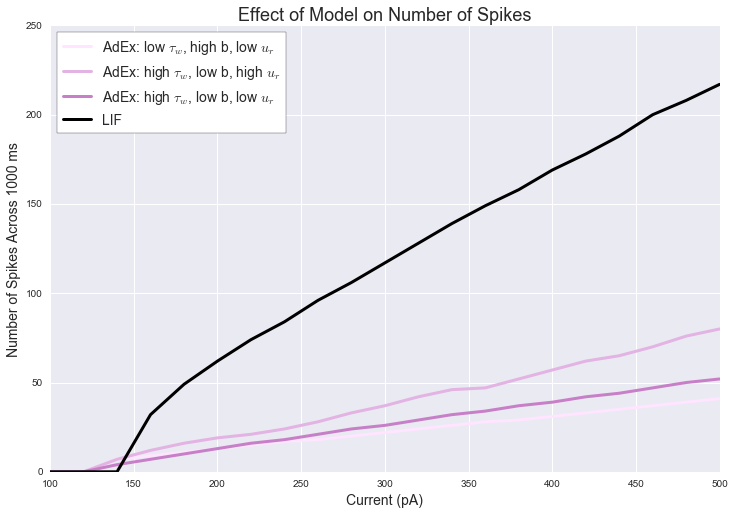

In [23]:
# Plot number of spikes against current value.
fig, ax = plt.subplots()
for i, model in enumerate(names.keys()):
    if model == 'LIF':
        c = 'black'
    else:
        c = palette[i]
    ax.plot(current_range, names[model]['n_spikes'],
            lw=3., c=c,
            label=names[model]['descrip'])
legend = ax.legend(frameon=True, loc='upper left', fontsize=14)
frame = legend.get_frame()
frame.set_facecolor('white')
frame.set_edgecolor('black')
ax.set_xlabel('Current (pA)', fontsize=14)
ax.set_ylabel('Number of Spikes Across 1000 ms', fontsize=14)
ax.set_title('Effect of Model on Number of Spikes', fontsize=18)
plt.show(fig)

All else held equal, an increase in *u_r* (e.g., Q3B vs. Q3C) increases the rate at which increases in current increase the number of spikes. As *b* decreases and *tau_w* increases (e.g., Q3A vs. Q3C), the rate at which increases in current increase the number of spikes increases. Based on these simulations, it is impossible to know whether *b* or *tau_w* drives this difference.

All of the AdEx models' spike rates increase far more slowly than the LIF neuron. As such, the input current value has a much greater effect on the LIF model's spike rate than on AdEx models. Also, the LIF model has a higher overall spike rate than the AdEx model. The underlying differences in the model dynamics do affect the *I - f* functions dramatically.